<h1><b>IBM Capstone Project</b></h1>

<h1><b>Find Optimal District in the city of Moscow for building a European Fine Dining Restaurant</b></h1>

<h3>Install missing packages</h3>

In [258]:
!pip3 install lxml --upgrade

In [259]:
!pip3 install geopy
!pip3 install folium
!pip3 install html5lib

In [260]:
!pip install BeautifulSoup4

In [261]:
!pip3 install BeautifulSoup4

In [262]:
!pip install requests

In [263]:
!pip install geopy

<h3>Import libraries</h3>

In [264]:
import numpy as np # numpy

import pandas as pd # pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# !conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

import xml
import bs4
from bs4 import BeautifulSoup
import requests

print('Libraries imported.')

Libraries imported.


<h3>Read data from text file</h3>

In [265]:
"""
Moscow district names are stored in district_list.txt file
"""
district_df = pd.read_csv('district_list.txt', header=None)
district_df.columns = ['Districts']
district_df.head()

Districts
0       Aeroport District
1  Akademichesky District
2    Alexeyevsky District
3    Altufyevsky District
4   Babushkinsky District

<h3>Use geopy and geocoder to get Latitude and Longitude values of Moscow itself and the districts above</h3>

In [266]:
address = 'Moscow, Russia'

geolocator = Nominatim(user_agent="my_Geocoder")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Moscow are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Moscow are 55.7504461, 37.6174943.


<h5><b>If you check Google, those coorindates are 100% correct</b></h5>

In [267]:
district_df["Latitude"] = ""
district_df["Longitude"] = ""
district_df.head()

Districts Latitude Longitude
0       Aeroport District                   
1  Akademichesky District                   
2    Alexeyevsky District                   
3    Altufyevsky District                   
4   Babushkinsky District

In [268]:
!pip install tqdm
!pip3 install tqdm

In [269]:
from tqdm import tqdm

<h5>Get the latitude and longitude of the districts, skip those that cannot be found</h5>

In [270]:
failed_locations = []
for index, row in tqdm(district_df.iterrows()):
    address = row['Districts'] + ', Moscow'
    try:
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
        district_df['Latitude'].iloc[index] = latitude
        district_df['Longitude'].iloc[index] = longitude
    except AttributeError:
        print("Can't find {}. Position {} will be empty".format(address, index))
        failed_locations.append(index)

1it [00:00,  8.61it/s]

The geograpical coordinate of Aeroport District, Moscow are 55.8026178, 37.5402974.


2it [00:00,  2.93it/s]

The geograpical coordinate of Akademichesky District, Moscow are 55.68935945, 37.577970527675376.


3it [00:01,  2.41it/s]

The geograpical coordinate of Alexeyevsky District, Moscow are 55.8148783, 37.6506684.


4it [00:01,  2.24it/s]

The geograpical coordinate of Altufyevsky District, Moscow are 55.880255, 37.5816349.


5it [00:02,  2.15it/s]

The geograpical coordinate of Babushkinsky District, Moscow are 55.8659576, 37.6638944.


6it [00:02,  2.09it/s]

The geograpical coordinate of Basmanny District, Moscow are 55.7672809, 37.6697732.


7it [00:03,  2.06it/s]

The geograpical coordinate of Begovoy District, Moscow are 55.7819165, 37.5662996.


8it [00:03,  2.04it/s]

The geograpical coordinate of Beskudnikovsky District, Moscow are 55.8670782, 37.5543785.


9it [00:04,  2.02it/s]

The geograpical coordinate of Bibirevo District, Moscow are 55.89531865, 37.61298891004043.


10it [00:04,  2.02it/s]

The geograpical coordinate of Biryulyovo Vostochnoye District, Moscow are 55.5961213, 37.6752547.


11it [00:05,  2.01it/s]

The geograpical coordinate of Biryulyovo Zapadnoye District, Moscow are 55.5879862, 37.6363193.


12it [00:05,  2.01it/s]

The geograpical coordinate of Bogorodskoye District, Moscow are 55.8199287, 37.702941213837654.


13it [00:06,  2.00it/s]

The geograpical coordinate of Businovo District, Moscow are 55.8806673, 37.4937883.


14it [00:06,  2.01it/s]

The geograpical coordinate of Butyrsky District, Moscow are 55.8137908, 37.5929255.


15it [00:07,  2.01it/s]

The geograpical coordinate of Chertanovo Severnoye District, Moscow are 55.6330775, 37.6052365.


16it [00:07,  2.00it/s]

The geograpical coordinate of Chertanovo Tsentralnoye District, Moscow are 55.6151581, 37.6032734.


17it [00:08,  2.01it/s]

The geograpical coordinate of Chertanovo Yuzhnoye District, Moscow are 55.5898352, 37.5957481.


18it [00:08,  2.00it/s]

The geograpical coordinate of Cheryomushki District, Moscow are 55.6635403, 37.5610662.


19it [00:09,  2.00it/s]

The geograpical coordinate of Danilovsky District, Moscow are 55.706758, 37.63815993852231.


20it [00:09,  2.00it/s]

The geograpical coordinate of Dmitrovsky District, Moscow are 56.36614795, 37.41795774920743.


21it [00:10,  2.00it/s]

The geograpical coordinate of Donskoy District, Moscow are 55.70531685, 37.5993383494122.


22it [00:10,  2.00it/s]

The geograpical coordinate of Dorogomilovo District, Moscow are 55.7398697, 37.5365271.


23it [00:11,  2.00it/s]

The geograpical coordinate of Fili-Davydkovo District, Moscow are 55.7288995, 37.4673379.


24it [00:11,  2.00it/s]

The geograpical coordinate of Filyovsky Park District, Moscow are 55.7470546, 37.4921813.


25it [00:12,  2.00it/s]

The geograpical coordinate of Gagarinsky District, Moscow are 55.69814995, 37.557893550646654.


26it [00:12,  2.00it/s]

The geograpical coordinate of Golovinsky District, Moscow are 55.851951850000006, 37.52236506551988.


27it [00:13,  2.00it/s]

The geograpical coordinate of Golyanovo District, Moscow are 55.8184501, 37.8072685.


28it [00:13,  2.00it/s]

The geograpical coordinate of Ivanovskoye District, Moscow are 55.7700304, 37.8258305.


29it [00:14,  2.00it/s]

The geograpical coordinate of Izmaylovo District, Moscow are 55.7966159, 37.7841549.


30it [00:14,  2.00it/s]

The geograpical coordinate of Kapotnya District, Moscow are 55.6367482, 37.7984857.


31it [00:15,  2.00it/s]

The geograpical coordinate of Khoroshyovo-Mnyovniki District, Moscow are 55.7787568, 37.4800743.


32it [00:15,  2.00it/s]

The geograpical coordinate of Khoroshyovsky District, Moscow are 55.7789309, 37.5271723.


33it [00:16,  2.00it/s]

The geograpical coordinate of Khovrino District, Moscow are 55.8693575, 37.4887954.


34it [00:16,  2.00it/s]

The geograpical coordinate of Konkovo District, Moscow are 55.6404632, 37.52564567636833.


35it [00:17,  1.99it/s]

The geograpical coordinate of Koptevo District, Moscow are 55.8301455, 37.52166188725094.


36it [00:17,  2.00it/s]

The geograpical coordinate of Kosino-Ukhtomsky District, Moscow are 55.7137363, 37.8884848.


37it [00:18,  2.00it/s]

The geograpical coordinate of Kotlovka District, Moscow are 55.67779265, 37.59688144600774.


38it [00:18,  2.00it/s]

The geograpical coordinate of Krasnoselsky District, Moscow are 55.7774472, 37.6541598.


39it [00:19,  2.00it/s]

The geograpical coordinate of Krylatskoye District, Moscow are 55.76128705, 37.42593374522882.


40it [00:19,  2.00it/s]

The geograpical coordinate of Kryukovo District, Moscow are 55.9763429, 37.1596291.


41it [00:20,  2.00it/s]

The geograpical coordinate of Kuntsevo District, Moscow are 55.7426325, 37.3974723.


42it [00:20,  2.00it/s]

The geograpical coordinate of Kurkino District, Moscow are 55.8936207, 37.3887002.


43it [00:21,  2.00it/s]

The geograpical coordinate of Kuzminki District, Moscow are 55.69831805, 37.77170068898855.


44it [00:21,  2.00it/s]

The geograpical coordinate of Lefortovo District, Moscow are 55.7573988, 37.7049319.


45it [00:22,  2.00it/s]

The geograpical coordinate of Levoberezhny District, Moscow are 55.8650743, 37.4691831.


46it [00:22,  2.00it/s]

The geograpical coordinate of Lianozovo District, Moscow are 55.9001565, 37.566279234750205.


47it [00:23,  2.00it/s]

The geograpical coordinate of Lomonosovsky District, Moscow are 55.6799618, 37.5332552.


48it [00:23,  2.00it/s]

The geograpical coordinate of Losinoostrovsky District, Moscow are 55.87822215, 37.69392426551288.


49it [00:24,  2.00it/s]

The geograpical coordinate of Lyublino District, Moscow are 55.677325, 37.755227.


50it [00:24,  2.00it/s]

The geograpical coordinate of Marfino District, Moscow are 55.8309084, 37.5914584.


51it [00:25,  1.99it/s]

The geograpical coordinate of Maryina roshcha District, Moscow are 55.797837, 37.6109903.


52it [00:25,  2.00it/s]

The geograpical coordinate of Maryino District, Moscow are 55.650711, 37.7353743.


53it [00:26,  2.00it/s]

The geograpical coordinate of Meshchansky District, Moscow are 55.779172, 37.6279886.


54it [00:26,  2.00it/s]

The geograpical coordinate of Metrogorodok District, Moscow are 55.8249036, 37.756955.


55it [00:27,  2.00it/s]

The geograpical coordinate of Mitino District, Moscow are 55.8454574, 37.3670608.


56it [00:27,  2.00it/s]

The geograpical coordinate of Molzhaninovsky District, Moscow are 55.9367237, 37.3769255.


57it [00:28,  2.00it/s]

The geograpical coordinate of Moskvorechye-Saburovo District, Moscow are 55.6428651, 37.6703469.


58it [00:28,  1.99it/s]

The geograpical coordinate of Mozhaysky District, Moscow are 55.5235031, 35.79522943293135.


59it [00:29,  2.00it/s]

The geograpical coordinate of Nagatino-Sadovniki District, Moscow are 55.6746117, 37.6454806.


60it [00:29,  2.01it/s]

The geograpical coordinate of Nagatinsky Zaton District, Moscow are 55.6754775, 37.68106836866207.


61it [00:30,  2.00it/s]

The geograpical coordinate of Nagorny District, Moscow are 55.665586399999995, 37.616878024335485.


62it [00:30,  1.99it/s]

The geograpical coordinate of Nekrasovka District, Moscow are 55.6973427, 37.94227013925728.


63it [00:31,  1.97it/s]

The geograpical coordinate of Nizhegorodsky District, Moscow are 55.7328112, 37.72907047486139.


64it [00:31,  2.01it/s]

The geograpical coordinate of Novo-Peredelkino District, Moscow are 55.6461043, 37.352684.


65it [00:32,  2.01it/s]

The geograpical coordinate of Novogireyevo District, Moscow are 55.7478477, 37.80759734691753.


66it [00:32,  2.00it/s]

The geograpical coordinate of Novokosino District, Moscow are 55.742273, 37.8656486.


67it [00:33,  2.00it/s]

The geograpical coordinate of Obruchevsky District, Moscow are 55.6641579, 37.5203033.


68it [00:33,  2.00it/s]

The geograpical coordinate of Ochakovo-Matveyevskoye District, Moscow are 55.690291, 37.4406611.


69it [00:34,  2.00it/s]

The geograpical coordinate of Orekhovo-Borisovo Severnoye District, Moscow are 55.619223, 37.7011025.


70it [00:34,  2.00it/s]

The geograpical coordinate of Orekhovo-Borisovo Yuzhnoye District, Moscow are 55.603885, 37.729895.


71it [00:35,  2.00it/s]

The geograpical coordinate of Ostankinsky District, Moscow are 55.8210768, 37.619119.


72it [00:35,  2.00it/s]

The geograpical coordinate of Otradnoye District, Moscow are 55.8646371, 37.6044745.


73it [00:36,  2.00it/s]

The geograpical coordinate of Pechatniki District, Moscow are 55.6849592, 37.7236236.


74it [00:36,  2.00it/s]

The geograpical coordinate of Perovo District, Moscow are 55.75106905, 37.75316294904828.


75it [00:37,  2.00it/s]

The geograpical coordinate of Pokrovskoye-Streshnevo District, Moscow are 55.8127392, 37.4622685.


76it [00:37,  2.00it/s]

The geograpical coordinate of Preobrazhenskoye District, Moscow are 55.7938235, 37.7113174.


77it [00:38,  2.00it/s]

The geograpical coordinate of Presnensky District, Moscow are 55.7622146, 37.5606576.


78it [00:38,  2.00it/s]

The geograpical coordinate of Prospekt Vernadskogo District, Moscow are 55.6754152, 37.50033023079773.


79it [00:39,  2.00it/s]

The geograpical coordinate of Ramenki District, Moscow are 55.7018348, 37.5041069.


80it [00:39,  2.00it/s]

The geograpical coordinate of Rostokino District, Moscow are 55.83501245, 37.65247601942863.


81it [00:40,  2.00it/s]

The geograpical coordinate of Ryazansky District, Moscow are 55.7221834, 37.7688303.


82it [00:40,  2.00it/s]

The geograpical coordinate of Savyolki District, Moscow are 55.9887972, 37.2218808.


83it [00:41,  2.00it/s]

The geograpical coordinate of Savyolovsky District, Moscow are 55.7997689, 37.5708333.


84it [00:41,  2.00it/s]

The geograpical coordinate of Severnoye Butovo District, Moscow are 55.5714094, 37.5776237.


85it [00:42,  2.00it/s]

The geograpical coordinate of Severnoye Izmaylovo District, Moscow are 55.8067811, 37.8033479.


86it [00:42,  2.00it/s]

The geograpical coordinate of Severnoye Medvedkovo District, Moscow are 55.889663, 37.6529265.


87it [00:43,  1.99it/s]

Can't find Severnoye Tushino District, Moscow. Position 86 will be empty


88it [00:43,  2.01it/s]

The geograpical coordinate of Severny District, Moscow are 55.932539750000004, 37.5430355899533.


89it [00:44,  2.00it/s]

The geograpical coordinate of Shchukino District, Moscow are 55.8005723, 37.4730552.


90it [00:44,  2.00it/s]

The geograpical coordinate of Silino District, Moscow are 56.0017567, 37.1688978.


91it [00:45,  2.00it/s]

The geograpical coordinate of Sokol District, Moscow are 55.8050063, 37.5056244.


92it [00:45,  2.00it/s]

The geograpical coordinate of Sokolinaya Gora District, Moscow are 55.772866199999996, 37.73010880461648.


93it [00:46,  2.00it/s]

The geograpical coordinate of Sokolniki District, Moscow are 55.803106549999995, 37.676785546510615.


94it [00:46,  2.00it/s]

The geograpical coordinate of Solntsevo District, Moscow are 55.65443845, 37.39257394460023.


95it [00:47,  2.00it/s]

The geograpical coordinate of Staroye Kryukovo District, Moscow are 55.9798892, 37.1976931.


96it [00:47,  2.00it/s]

The geograpical coordinate of Strogino District, Moscow are 55.8013351, 37.4030525.


97it [00:48,  2.00it/s]

The geograpical coordinate of Sviblovo District, Moscow are 55.853104849999994, 37.64679060218354.


98it [00:48,  2.00it/s]

The geograpical coordinate of Tagansky District, Moscow are 55.7415723, 37.6670626.


99it [00:49,  1.84it/s]

The geograpical coordinate of Tekstilshchiki District, Moscow are 55.7031811, 37.7405918.


100it [00:49,  2.05it/s]

The geograpical coordinate of Timiryazevsky District, Moscow are 55.8258166, 37.5577439.


101it [00:50,  2.03it/s]

The geograpical coordinate of Troparyovo-Nikulino District, Moscow are 55.6603217, 37.4682226.


102it [00:50,  2.03it/s]

The geograpical coordinate of Tsaritsyno District, Moscow are 55.6265942, 37.6670226.


103it [00:51,  2.02it/s]

The geograpical coordinate of Tverskoy District, Moscow are 55.7691461, 37.6088355.


104it [00:51,  2.01it/s]

The geograpical coordinate of Tyoply Stan District, Moscow are 55.6259323, 37.4938342.


105it [00:52,  2.01it/s]

The geograpical coordinate of Veshnyaki District, Moscow are 55.7274735, 37.8248787.


106it [00:52,  2.01it/s]

The geograpical coordinate of Vnukovo District, Moscow are 55.6012188, 37.27744021338393.


107it [00:53,  2.00it/s]

The geograpical coordinate of Vostochnoye Degunino District, Moscow are 55.8829192, 37.5577688.


108it [00:53,  2.00it/s]

The geograpical coordinate of Vostochnoye Izmaylovo District, Moscow are 55.7965807, 37.8218434.


109it [00:54,  2.00it/s]

The geograpical coordinate of Vostochny District, Moscow are 55.8188903, 37.8675117.


110it [00:54,  2.00it/s]

The geograpical coordinate of Voykovsky District, Moscow are 55.819399, 37.4938496.


111it [00:55,  2.00it/s]

The geograpical coordinate of Vykhino-Zhulebino District, Moscow are 55.6937767, 37.850983.


112it [00:55,  2.00it/s]

The geograpical coordinate of Yakimanka District, Moscow are 55.7383741, 37.6169128.


113it [00:56,  2.01it/s]

The geograpical coordinate of Yaroslavsky District, Moscow are 55.861432, 37.6935724.


114it [00:56,  2.00it/s]

The geograpical coordinate of Yasenevo District, Moscow are 55.60666, 37.534007.


115it [00:57,  2.00it/s]

The geograpical coordinate of Yuzhnoportovy District, Moscow are 55.7144062, 37.6769232.


116it [00:57,  2.00it/s]

The geograpical coordinate of Yuzhnoye Butovo District, Moscow are 55.5412721, 37.5325392.


117it [00:58,  2.00it/s]

The geograpical coordinate of Yuzhnoye Medvedkovo District, Moscow are 55.8748262, 37.6338939.


118it [00:58,  2.00it/s]

The geograpical coordinate of Yuzhnoye Tushino District, Moscow are 55.8438581, 37.4315406.


119it [00:59,  2.00it/s]

The geograpical coordinate of Zapadnoye Degunino District, Moscow are 55.8732647, 37.5181287.


120it [00:59,  2.00it/s]

The geograpical coordinate of Zyablikovo District, Moscow are 55.6211068, 37.7464762846473.


121it [01:00,  2.01it/s]

The geograpical coordinate of Zyuzino District, Moscow are 55.6531418, 37.5867464.


In [271]:
district_df.head()

Districts Latitude Longitude
0       Aeroport District  55.8026   37.5403
1  Akademichesky District  55.6894    37.578
2    Alexeyevsky District  55.8149   37.6507
3    Altufyevsky District  55.8803   37.5816
4   Babushkinsky District   55.866   37.6639

In [272]:
district_df.shape # shape of our dataframe 

(121, 3)

In [273]:
district_df_mod = district_df[district_df["Latitude"]!=0]

In [274]:
district_df_mod.shape

(121, 3)

In [275]:
num_failed = len(failed_locations)
num_failed

1

In [276]:
print("The index of failed location is: ", failed_locations)

The index of failed location is:  [86]


In [277]:
district_df

Districts Latitude Longitude
0                       Aeroport District  55.8026   37.5403
1                  Akademichesky District  55.6894    37.578
2                    Alexeyevsky District  55.8149   37.6507
3                    Altufyevsky District  55.8803   37.5816
4                   Babushkinsky District   55.866   37.6639
5                       Basmanny District  55.7673   37.6698
6                        Begovoy District  55.7819   37.5663
7                 Beskudnikovsky District  55.8671   37.5544
8                       Bibirevo District  55.8953    37.613
9         Biryulyovo Vostochnoye District  55.5961   37.6753
10          Biryulyovo Zapadnoye District   55.588   37.6363
11                  Bogorodskoye District  55.8199   37.7029
12                      Businovo District  55.8807   37.4938
13                      Butyrsky District  55.8138   37.5929
14          Chertanovo Severnoye District  55.6331   37.6052
15       Chertanovo Tsentralnoye District  55.6152   37.6033
16           Chertanovo Yuzhnoye District  55.5898   37.5957
17                  Cheryomushki District  55.6635   37.5611
18                    Danilovsky District  55.7068   37.6382
19                    Dmitrovsky District  56.3661    37.418
20                       Donskoy District  55.7053   37.5993
21                  Dorogomilovo District  55.7399   37.5365
22                Fili-Davydkovo District  55.7289   37.4673
23                Filyovsky Park District  55.7471   37.4922
24                    Gagarinsky District  55.6981   37.5579
25                    Golovinsky District   55.852   37.5224
26                     Golyanovo District  55.8185   37.8073
27                   Ivanovskoye District    55.77   37.8258
28                     Izmaylovo District  55.7966   37.7842
29                      Kapotnya District  55.6367   37.7985
30         Khoroshyovo-Mnyovniki District  55.7788   37.4801
31                 Khoroshyovsky District  55.7789   37.5272
32                      Khovrino District  55.8694   37.4888
33                       Konkovo District  55.6405   37.5256
34                       Koptevo District  55.8301   37.5217
35              Kosino-Ukhtomsky District  55.7137   37.8885
36                      Kotlovka District  55.6778   37.5969
37                  Krasnoselsky District  55.7774   37.6542
38                   Krylatskoye District  55.7613   37.4259
39                      Kryukovo District  55.9763   37.1596
40                      Kuntsevo District  55.7426   37.3975
41                       Kurkino District  55.8936   37.3887
42                      Kuzminki District  55.6983   37.7717
43                     Lefortovo District  55.7574   37.7049
44                  Levoberezhny District  55.8651   37.4692
45                     Lianozovo District  55.9002   37.5663
46                  Lomonosovsky District    55.68   37.5333
47               Losinoostrovsky District  55.8782   37.6939
48                      Lyublino District  55.6773   37.7552
49                       Marfino District  55.8309   37.5915
50               Maryina roshcha District  55.7978    37.611
51                       Maryino District  55.6507   37.7354
52                   Meshchansky District  55.7792    37.628
53                  Metrogorodok District  55.8249    37.757
54                        Mitino District  55.8455   37.3671
55                Molzhaninovsky District  55.9367   37.3769
56         Moskvorechye-Saburovo District  55.6429   37.6703
57                     Mozhaysky District  55.5235   35.7952
58            Nagatino-Sadovniki District  55.6746   37.6455
59              Nagatinsky Zaton District  55.6755   37.6811
60                       Nagorny District  55.6656   37.6169
61                    Nekrasovka District  55.6973   37.9423
62                 Nizhegorodsky District  55.7328   37.7291
63              Novo-Peredelkino District  55.6461   37.3527
64                  Novogireyevo District  55.7478   37.8076
65    

In [278]:
district_df["Latitude"].iloc[86]

''

In [279]:
district_df = district_df[district_df["Latitude"]!='']

In [280]:
district_df.shape

(120, 3)

<h5>Since we only have one failed location, we have more than enough data to keep working with</h5>

In [281]:
# Generate a Map of Moscow using latitude and longitude values
moscow_map = folium.Map(location=[latitude, longitude], zoom_start=12)
city = "Moscow"
# add markers to map
for lat, lng, district in zip(district_df['Latitude'], district_df['Longitude'], district_df['Districts']):
    label = '{}, {}'.format(district, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.8,
        parse_html=False).add_to(moscow_map)  
    
moscow_map

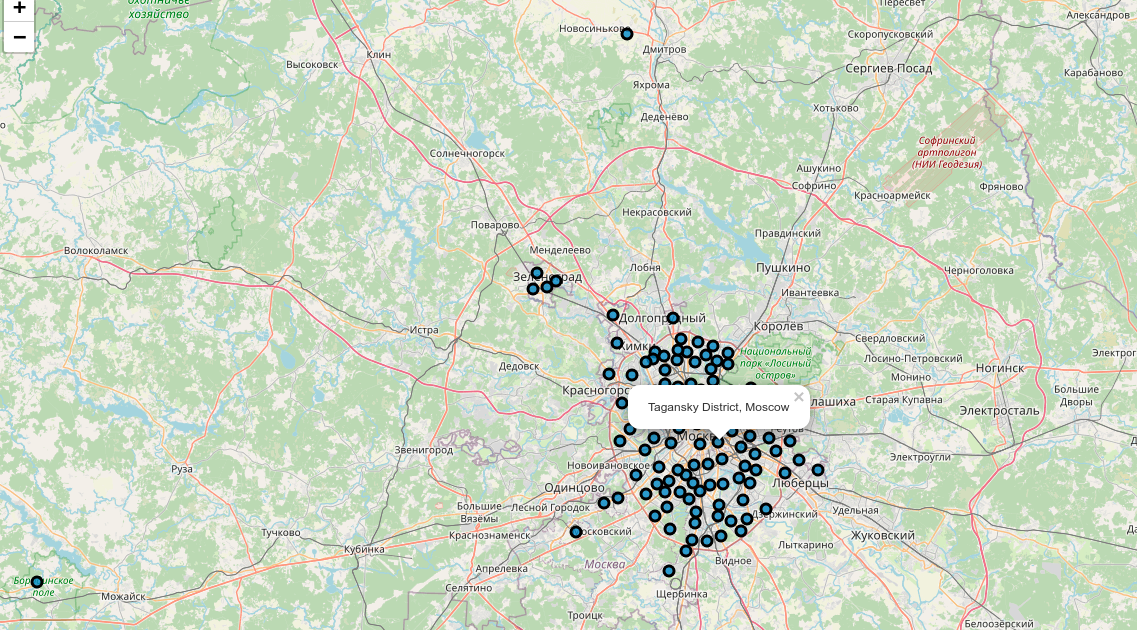

In [282]:
from IPython.display import Image
Image(filename='MoscowDistricts.png') 

<h3>Now that we visualized all the different neighbourhoods, let's get the venues and start clustering</h3>

<h5>Define Foursquare credentials and start pulling venue data</h5>

In [283]:
CLIENT_ID = 'IGGTP42JGJ1RYC10WHLOR0AO4ZMIASW2UDOGKX3KNJO1OE43' # your Foursquare ID
CLIENT_SECRET = 'BQU4ZXZTPMV20NKC2P5UVNUGOAVYOY3BJELKSF5JLAHZN4XH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IGGTP42JGJ1RYC10WHLOR0AO4ZMIASW2UDOGKX3KNJO1OE43
CLIENT_SECRET:BQU4ZXZTPMV20NKC2P5UVNUGOAVYOY3BJELKSF5JLAHZN4XH


In [284]:
district_df.head()

Districts Latitude Longitude
0       Aeroport District  55.8026   37.5403
1  Akademichesky District  55.6894    37.578
2    Alexeyevsky District  55.8149   37.6507
3    Altufyevsky District  55.8803   37.5816
4   Babushkinsky District   55.866   37.6639

In [285]:
district_df.shape

(120, 3)

<h4><b>Let's explore the first district in Moscow</b></h4>

In [286]:
district_df.loc[0, 'Districts']

'Aeroport District'

<h4><b>Now let's get the venues in a fixed radius around that district</b></h4>

In [287]:
distr_lat = district_df.loc[0, 'Latitude'] # district latitude value
distr_long = district_df.loc[0, 'Longitude'] # district longitude value

distr_name = district_df.loc[0, 'Districts'] # district name

print('Latitude and longitude values of {} are {}, {}.'.format(distr_name, 
                                                               distr_lat, 
                                                               distr_long))

Latitude and longitude values of Aeroport District are 55.8026178, 37.5402974.


In [288]:
"""
Now we will get the top 100 venues around Aeroport District
"""

# type your answer here

LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    distr_lat, 
    distr_long, 
    radius,
    LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=IGGTP42JGJ1RYC10WHLOR0AO4ZMIASW2UDOGKX3KNJO1OE43&client_secret=BQU4ZXZTPMV20NKC2P5UVNUGOAVYOY3BJELKSF5JLAHZN4XH&v=20180605&ll=55.8026178,37.5402974&radius=500&limit=100'

In [289]:
"""
Send the get requests and examine the results
"""
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '601315672c351f569a94e4c0'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Aeroport',
  'headerFullLocation': 'Aeroport, Moscow',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 19,
  'suggestedBounds': {'ne': {'lat': 55.8071178045, 'lng': 37.548288926964815},
   'sw': {'lat': 55.7981177955, 'lng': 37.532305873035185}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4dd824e91838b8561cf9e65e',
       'name': 'Аптека на Старом Зыковском',
       'location': {'address': 'планетная ул., д. 27',
        'crossStreet': 'Старый Зыковский',
        'lat': 55.80195021257624,
        'lng': 37.54502530744644,
        'labeledLatLngs': [

<h4><b>We will now write a function to extract just the categories of the venue</b></h4>

In [290]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [291]:
"""
In this step, we will use the above function to extract the categories
from the results json file and store them in a dataframe of their own
"""
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


name         categories        lat        lng
0  Аптека на Старом Зыковском           Pharmacy  55.801950  37.545025
1                    ВкусВилл  Health Food Store  55.804333  37.535205
2                     Отдохни       Liquor Store  55.805900  37.536928
3                Cosmic Latte        Coffee Shop  55.799551  37.534983
4                 Круглосутка  Convenience Store  55.802615  37.533316

In [292]:
nearby_venues

name            categories        lat  \
0            Аптека на Старом Зыковском              Pharmacy  55.801950   
1                              ВкусВилл     Health Food Store  55.804333   
2                               Отдохни          Liquor Store  55.805900   
3                          Cosmic Latte           Coffee Shop  55.799551   
4                           Круглосутка     Convenience Store  55.802615   
5                            Динозаврик             Pet Store  55.801778   
6                           Dali (Дали)    Salon / Barbershop  55.802846   
7                                Busido   Martial Arts School  55.799815   
8                           ПРАВDA КОФЕ           Coffee Shop  55.803584   
9                                Kuzina          Dessert Shop  55.804354   
10  Кулинарная лавка братьев Караваевых         Deli / Bodega  55.801790   
11                             Подружка        Cosmetics Shop  55.804445   
12                      Фитнес Практика  Gym / Fitness Center  55.799728   
13                          Coffee Bean           Coffee Shop  55.798437   
14                  Булочная Фокина №12                Bakery  55.802957   
15                             Горздрав              Pharmacy  55.804181   
16                        Ароматный мир             Wine Shop  55.803879   
17          Остановка ул. Черняховского              Bus Stop  55.806251   
18                                  137      Basketball Court  55.804714   

          lng  
0   37.545025  
1   37.535205  
2   37.536928  
3   37.534983  
4   37.533316  
5   37.536579  
6   37.537420  
7   37.543609  
8   37.534087  
9   37.534308  
10  37.532737  
11  37.535377  
12  37.543701  
13  37.537411  
14  37.533295  
15  37.534188  
16  37.534106  
17  37.537388  
18  37.533368

In [293]:
print("We can tell that a total of 19 values was returned by Foursquare for this district")
print("====================")
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

We can tell that a total of 19 values was returned by Foursquare for this district
19 venues were returned by Foursquare.


<h2><b>The above process can be repeated for every district in Moscow by writing a function</b></h2>

In [294]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    """
    This function returns all the venues for a district
    """
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [295]:
"""
Now we call the function
"""
moscow_venues = getNearbyVenues(names=district_df['Districts'],
                                   latitudes=district_df['Latitude'],
                                   longitudes=district_df['Longitude']
                                  )

Aeroport District
Akademichesky District
Alexeyevsky District
Altufyevsky District
Babushkinsky District
Basmanny District
Begovoy District
Beskudnikovsky District
Bibirevo District
Biryulyovo Vostochnoye District
Biryulyovo Zapadnoye District
Bogorodskoye District
Businovo District
Butyrsky District
Chertanovo Severnoye District
Chertanovo Tsentralnoye District
Chertanovo Yuzhnoye District
Cheryomushki District
Danilovsky District
Dmitrovsky District
Donskoy District
Dorogomilovo District
Fili-Davydkovo District
Filyovsky Park District
Gagarinsky District
Golovinsky District
Golyanovo District
Ivanovskoye District
Izmaylovo District
Kapotnya District
Khoroshyovo-Mnyovniki District
Khoroshyovsky District
Khovrino District
Konkovo District
Koptevo District
Kosino-Ukhtomsky District
Kotlovka District
Krasnoselsky District
Krylatskoye District
Kryukovo District
Kuntsevo District
Kurkino District
Kuzminki District
Lefortovo District
Levoberezhny District
Lianozovo District
Lomonosovsky Dis

In [296]:
print(moscow_venues.shape)
moscow_venues.head(50)

(2227, 7)


District  District Latitude  District Longitude  \
0        Aeroport District          55.802618           37.540297   
1        Aeroport District          55.802618           37.540297   
2        Aeroport District          55.802618           37.540297   
3        Aeroport District          55.802618           37.540297   
4        Aeroport District          55.802618           37.540297   
5        Aeroport District          55.802618           37.540297   
6        Aeroport District          55.802618           37.540297   
7        Aeroport District          55.802618           37.540297   
8        Aeroport District          55.802618           37.540297   
9        Aeroport District          55.802618           37.540297   
10       Aeroport District          55.802618           37.540297   
11       Aeroport District          55.802618           37.540297   
12       Aeroport District          55.802618           37.540297   
13       Aeroport District          55.802618           37.540297   
14       Aeroport District          55.802618           37.540297   
15       Aeroport District          55.802618           37.540297   
16       Aeroport District          55.802618           37.540297   
17       Aeroport District          55.802618           37.540297   
18       Aeroport District          55.802618           37.540297   
19  Akademichesky District          55.689359           37.577971   
20  Akademichesky District          55.689359           37.577971   
21  Akademichesky District          55.689359           37.577971   
22  Akademichesky District          55.689359           37.577971   
23  Akademichesky District          55.689359           37.577971   
24  Akademichesky District          55.689359           37.577971   
25  Akademichesky District          55.689359           37.577971   
26  Akademichesky District          55.689359           37.577971   
27  Akademichesky District          55.689359           37.577971   
28  Akademichesky District          55.689359           37.577971   
29  Akademichesky District          55.689359           37.577971   
30  Akademichesky District          55.689359           37.577971   
31  Akademichesky District          55.689359           37.577971   
32  Akademichesky District          55.689359           37.577971   
33  Akademichesky District          55.689359           37.577971   
34  Akademichesky District          55.689359           37.577971   
35  Akademichesky District          55.689359           37.577971   
36  Akademichesky District          55.689359           37.577971   
37  Akademichesky District          55.689359           37.577971   
38  Akademichesky District          55.689359           37.577971   
39  Akademichesky District          55.689359           37.577971   
40  Akademichesky District          55.689359           37.577971   
41  Akademichesky District          55.689359           37.577971   
42  Akademichesky District          55.689359           37.577971   
43  Akademichesky District          55.689359           37.577971   
44  Akademichesky District          55.689359           37.577971   
45  Akademichesky District          55.689359           37.577971   
46  Akademichesky District          55.689359           37.577971   
47  Akademichesky District          55.689359           37.577971   
48  Akademichesky District          55.689359           37.577971   
49  Akademichesky District          55.689359           37.577971   

                                       Venue  Venue Latitude  Venue Longitude  \
0                 Аптека на Старом Зыковском       55.801950        37.545025   
1                                   ВкусВилл       55.804333        37.535205   
2                                    Отдохни       55.805900        37.536928   
3                               Cosmic Latte       55.799551        37.534983   
4                                Круглосутка       55.802615        37.533316   
5           

<h5><b>Let's check how many venues were returned per district</b></h5>

In [297]:
moscow_venues.groupby('District').count()

District Latitude  District Longitude  \
District                                                                      
Aeroport District                                    19                  19   
Akademichesky District                               42                  42   
Alexeyevsky District                                 26                  26   
Altufyevsky District                                 17                  17   
Babushkinsky District                                24                  24   
Basmanny District                                    21                  21   
Begovoy District                                     31                  31   
Beskudnikovsky District                              12                  12   
Bibirevo District                                    14                  14   
Biryulyovo Vostochnoye District                       9                   9   
Biryulyovo Zapadnoye District                         6                   6   
Bogorodskoye District                                 7                   7   
Businovo District                                     4                   4   
Butyrsky District                                     9                   9   
Chertanovo Severnoye District                         4                   4   
Chertanovo Tsentralnoye District                     53                  53   
Chertanovo Yuzhnoye District                         14                  14   
Cheryomushki District                                20                  20   
Danilovsky District                                  42                  42   
Donskoy District                                     19                  19   
Dorogomilovo District                                30                  30   
Fili-Davydkovo District                              31                  31   
Filyovsky Park District                              25                  25   
Gagarinsky District                                  30                  30   
Golovinsky District                                  13                  13   
Golyanovo District                                    9                   9   
Ivanovskoye District                                 21                  21   
Izmaylovo District                                   32                  32   
Kapotnya District                                     7                   7   
Khoroshyovo-Mnyovniki District                       27                  27   
Khoroshyovsky District                               24                  24   
Khovrino District                                    16                  16   
Konkovo District                                     52                  52   
Koptevo District                                     17                  17   
Kosino-Ukhtomsky District                            14                  14   
Kotlovka District                                    10                  10   
Krasnoselsky District                                24                  24   
Krylatskoye District                                  7                   7   
Kryukovo District                                    15                  15   
Kuntsevo District                                    14                  14   
Kurkino District                                     19                  19   
Kuzminki District                                    20                  20   
Lefortovo District                                   13                  13   
Levoberezhny District                                11                  11   
Lianozovo District                                   16                  16   
Lomonosovsky District                                41                  41   
Losinoostrovsky District                              8                   8   
Lyublino District                                    16                  16   
Marfino District                                     13                  13   
Maryina r

In [298]:
"""
Check how many unique venues were returned
"""
print('There are {} uniques categories.'.format(len(moscow_venues['Venue Category'].unique())))

There are 274 uniques categories.


<h2><b>We can now analyze each district separately</b></h2>

In [299]:
moscow_onehot = pd.get_dummies(moscow_venues["Venue Category"]) # one hot encode the venue categories

In [300]:
moscow_df_new = pd.concat([district_df["Districts"], moscow_onehot], axis=1)

In [301]:
moscow_df_new.head()

Districts  ATM  Accessories Store  Adult Boutique  \
0       Aeroport District    0                  0               0   
1  Akademichesky District    0                  0               0   
2    Alexeyevsky District    0                  0               0   
3    Altufyevsky District    0                  0               0   
4   Babushkinsky District    0                  0               0   

   Airport Lounge  American Restaurant  Arcade  Art Gallery  Art Museum  \
0               0                    0       0            0           0   
1               0                    0       0            0           0   
2               0                    0       0            0           0   
3               0                    0       0            0           0   
4               0                    0       0            0           0   

   Art Studio  Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0           0                    0                     0                 0   
1           0                    0                     0                 0   
2           0                    0                     0                 0   
3           0                    0                     0                 0   
4           0                    0                     0                 0   

   Athletics & Sports  Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  \
0                   0              0                0          0           0   
1                   0              0                0          0           0   
2                   0              0                0          0           0   
3                   0              0                0          0           0   
4                   0              0                0          0           0   

   Bakery  Bank  Bar  Basketball Court  Basketball Stadium  Bath House  Beach  \
0       0     0    0                 0                   0           0      0   
1       0     0    0                 0                   0           0      0   
2       0     0    0                 0                   0           0      0   
3       0     0    0                 0                   0           0      0   
4       0     0    0                 0                   0           0      0   

   Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  Big Box Store  \
0                0         0           0                   0              0   
1                0         0           0                   0              0   
2                0         0           0                   0              0   
3                0         0           0                   0              0   
4                0         0           0                   0              0   

   Bike Rental / Bike Share  Bike Shop  Bike Trail  Bistro  Blini House  \
0                         0          0           0       0            0   
1                         0          0           0       0            0   
2                         0          0           0       0            0   
3                         0          0           0       0            0   
4                         0          0           0       0            0   

   Board Shop  Bookstore  Botanical Garden  Boutique  Bowling Alley  \
0           0          0                 0         0              0   
1           0          0                 0         0              0   
2           0          0                 0         0              0   
3           0          0                 0         0              0   
4           0          0                 0         0              0   

   Breakfast Spot  Brewery  Bridal Shop  Buffet  Burger Joint  Bus Line  \
0               0        0            0       0             0         0   
1               0        0            0       0             0         0   
2               0        0            0       0             0         0   
3               0        0            0       0             

In [306]:
moscow_df_new.shape

(2227, 275)

In [303]:
# Function to return the most common venues in a district in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [304]:
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = moscow_df_new['Districts']

for ind in np.arange(moscow_df_new.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(moscow_df_new.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

District 1st Most Common Venue 2nd Most Common Venue  \
0       Aeroport District              Pharmacy           Film Studio   
1  Akademichesky District     Health Food Store           Zoo Exhibit   
2    Alexeyevsky District          Liquor Store           Film Studio   
3    Altufyevsky District           Coffee Shop           Zoo Exhibit   
4   Babushkinsky District     Convenience Store           Zoo Exhibit   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Event Space               Exhibit           Fabric Shop   
1           Film Studio               Exhibit           Fabric Shop   
2           Event Space               Exhibit           Fabric Shop   
3               Exhibit           Fabric Shop                  Farm   
4           Fish Market               Exhibit           Fabric Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                  Farm        Farmers Market  Fast Food Restaurant   
1                  Farm        Farmers Market  Fast Food Restaurant   
2                  Farm        Farmers Market  Fast Food Restaurant   
3        Farmers Market  Fast Food Restaurant           Film Studio   
4                  Farm        Farmers Market  Fast Food Restaurant   

  9th Most Common Venue 10th Most Common Venue 11th Most Common Venue  \
0           Zoo Exhibit            Escape Room            Flower Shop   
1           Fish Market            Escape Room            Flower Shop   
2           Fish Market     Frozen Yogurt Shop            Flower Shop   
3           Fish Market            Escape Room            Flower Shop   
4           Film Studio            Flower Shop            Escape Room   

  12th Most Common Venue 13th Most Common Venue 14th Most Common Venue  \
0      Food & Drink Shop             Food Court                 Forest   
1      Food & Drink Shop             Food Court                 Forest   
2      Food & Drink Shop             Food Court                 Forest   
3      Food & Drink Shop             Food Court                 Forest   
4      Food & Drink Shop             Food Court                 Forest   

  15th Most Common Venue  
0               Fountain  
1               Fountain  
2               Fountain  
3               Fountain  
4               Fountain

In [305]:
district_venues_sorted.shape

(2227, 16)

<h3><b>Cluster and Visualize the Districts with Venues</b></h3>

<h4>For the purposes of this task, we will use K-Means Clustering Algorithm to Cluster our Data</h4>

<h4>Since we don't know the optimal number of clusters, we will use silhouette analysis for to find the best values for n_clusters</h4>

In [307]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
%matplotlib inline

In [308]:
def silhouette_graph(Range, Scores, xaxis_lab, yaxis_lab):
    plt.figure(figsize=(30,15))
    plt.plot(np.arange(2, Range), Scores, 'ko-')
    plt.xlabel(xaxis_lab)
    plt.ylabel(yaxis_lab)
    plt.xticks(np.arange(2, Range))
    plt.show()

In [148]:
cluster_range = 12
clustered_venues = moscow_df_new.drop('Districts', axis=1)

index_list = []
score_list = []

for n_clusters in tqdm(range(2, cluster_range)) :
    
    moscow_df_upd = clustered_venues # create new dataframe moscow_df_update, set it equal to clustered venues df
    k_means = KMeans(n_clusters = n_clusters, random_state=0, init = 'k-means++').fit_predict(moscow_df_upd) # run k_means algorithm
    score = silhouette_score(moscow_df_upd, k_means) # get score
    index_list.append(n_clusters)
    score_list.append(score)

100%|██████████| 10/10 [01:41<00:00, 10.11s/it]


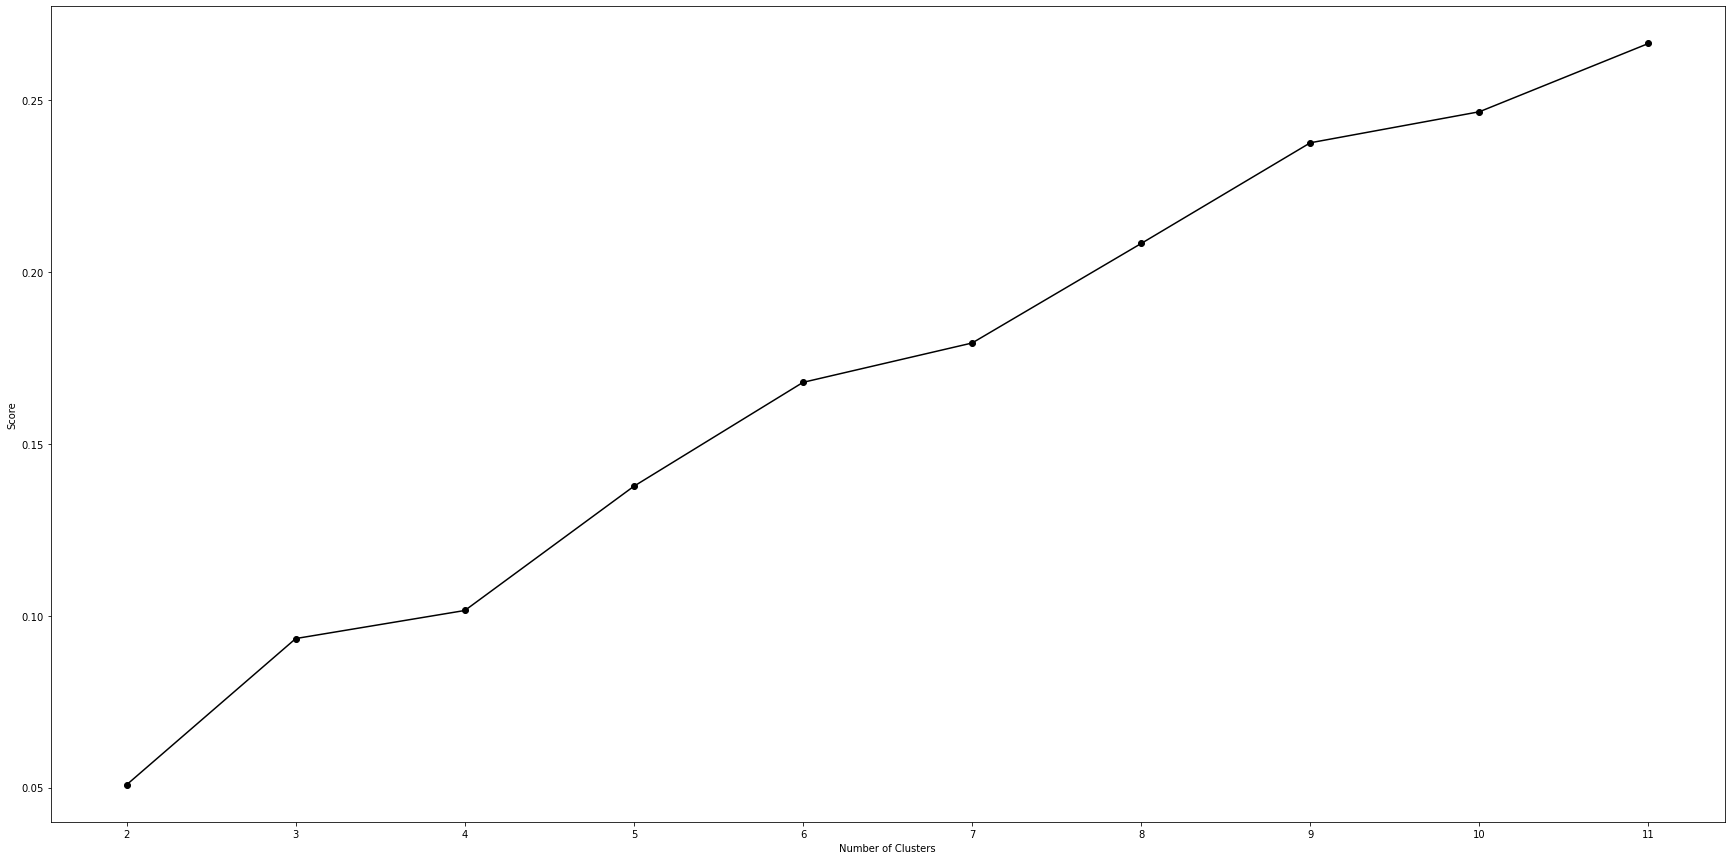

In [149]:
"""
Plot the obtained silhouette scores on a graph
"""

silhouette_graph(Range=cluster_range, Scores=score_list, xaxis_lab="Number of Clusters", yaxis_lab="Score")

<h2><b>We can see that 11 clusters yields the highest silhouette score</b></h2>

In [351]:
"""
Now we will run K-Means with n_clusters set to 11
"""
n_clusters=11
kmeans = KMeans(n_clusters=n_clusters, random_state=0, init='k-means++').fit(clustered_venues)

In [352]:
"""
Print the obtained labels from kmeans
"""
kmeans.labels_

array([5, 0, 0, ..., 0, 0, 0], dtype=int32)

In [353]:
print(clustered_venues.shape)
clustered_venues.head()

(2227, 274)


ATM  Accessories Store  Adult Boutique  Airport Lounge  \
0    0                  0               0               0   
1    0                  0               0               0   
2    0                  0               0               0   
3    0                  0               0               0   
4    0                  0               0               0   

   American Restaurant  Arcade  Art Gallery  Art Museum  Art Studio  \
0                    0       0            0           0           0   
1                    0       0            0           0           0   
2                    0       0            0           0           0   
3                    0       0            0           0           0   
4                    0       0            0           0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  \
0                   0              0                0          0           0   
1                   0              0                0          0           0   
2                   0              0                0          0           0   
3                   0              0                0          0           0   
4                   0              0                0          0           0   

   Bakery  Bank  Bar  Basketball Court  Basketball Stadium  Bath House  Beach  \
0       0     0    0                 0                   0           0      0   
1       0     0    0                 0                   0           0      0   
2       0     0    0                 0                   0           0      0   
3       0     0    0                 0                   0           0      0   
4       0     0    0                 0                   0           0      0   

   Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  Big Box Store  \
0                0         0           0                   0              0   
1                0         0           0                   0              0   
2                0         0           0                   0              0   
3                0         0           0                   0              0   
4                0         0           0                   0              0   

   Bike Rental / Bike Share  Bike Shop  Bike Trail  Bistro  Blini House  \
0                         0          0           0       0            0   
1                         0          0           0       0            0   
2                         0          0           0       0            0   
3                         0          0           0       0            0   
4                         0          0           0       0            0   

   Board Shop  Bookstore  Botanical Garden  Boutique  Bowling Alley  \
0           0          0                 0         0              0   
1           0          0                 0         0              0   
2           0          0                 0         0              0   
3           0          0                 0         0              0   
4           0          0                 0         0              0   

   Breakfast Spot  Brewery  Bridal Shop  Buffet  Burger Joint  Bus Line  \
0               0        0            0       0             0         0   
1               0        0            0       0             0         0   
2               0        0            0       0             0         0   
3               0        0            0       0             0         0   
4               0        0            0       0             0         0   

   Bus Stop  Business Service  Butcher  

In [354]:
print(district_df.shape)
district_df.head()

(120, 3)


Districts Latitude Longitude
0       Aeroport District  55.8026   37.5403
1  Akademichesky District  55.6894    37.578
2    Alexeyevsky District  55.8149   37.6507
3    Altufyevsky District  55.8803   37.5816
4   Babushkinsky District   55.866   37.6639

In [355]:
moscow_venue_upd = moscow_venues
moscow_venue_upd.head()

District  District Latitude  District Longitude  \
0  Aeroport District          55.802618           37.540297   
1  Aeroport District          55.802618           37.540297   
2  Aeroport District          55.802618           37.540297   
3  Aeroport District          55.802618           37.540297   
4  Aeroport District          55.802618           37.540297   

                        Venue  
0  Аптека на Старом Зыковском  
1                    ВкусВилл  
2                     Отдохни  
3                Cosmic Latte  
4                 Круглосутка

In [356]:
# moscow_venue_upd.drop(['Venue Latitude', 'Venue Longitude', 'Venue Category'], axis=1, inplace=True)
moscow_venue_upd.head()

District  District Latitude  District Longitude  \
0  Aeroport District          55.802618           37.540297   
1  Aeroport District          55.802618           37.540297   
2  Aeroport District          55.802618           37.540297   
3  Aeroport District          55.802618           37.540297   
4  Aeroport District          55.802618           37.540297   

                        Venue  
0  Аптека на Старом Зыковском  
1                    ВкусВилл  
2                     Отдохни  
3                Cosmic Latte  
4                 Круглосутка

In [357]:
print(moscow_venue_upd.shape)

(2227, 4)


In [358]:
print(district_venues_sorted.shape)
district_venues_sorted.head()

(2227, 16)


District 1st Most Common Venue 2nd Most Common Venue  \
0       Aeroport District              Pharmacy           Film Studio   
1  Akademichesky District     Health Food Store           Zoo Exhibit   
2    Alexeyevsky District          Liquor Store           Film Studio   
3    Altufyevsky District           Coffee Shop           Zoo Exhibit   
4   Babushkinsky District     Convenience Store           Zoo Exhibit   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Event Space               Exhibit           Fabric Shop   
1           Film Studio               Exhibit           Fabric Shop   
2           Event Space               Exhibit           Fabric Shop   
3               Exhibit           Fabric Shop                  Farm   
4           Fish Market               Exhibit           Fabric Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                  Farm        Farmers Market  Fast Food Restaurant   
1                  Farm        Farmers Market  Fast Food Restaurant   
2                  Farm        Farmers Market  Fast Food Restaurant   
3        Farmers Market  Fast Food Restaurant           Film Studio   
4                  Farm        Farmers Market  Fast Food Restaurant   

  9th Most Common Venue 10th Most Common Venue 11th Most Common Venue  \
0           Zoo Exhibit            Escape Room            Flower Shop   
1           Fish Market            Escape Room            Flower Shop   
2           Fish Market     Frozen Yogurt Shop            Flower Shop   
3           Fish Market            Escape Room            Flower Shop   
4           Film Studio            Flower Shop            Escape Room   

  12th Most Common Venue 13th Most Common Venue 14th Most Common Venue  \
0      Food & Drink Shop             Food Court                 Forest   
1      Food & Drink Shop             Food Court                 Forest   
2      Food & Drink Shop             Food Court                 Forest   
3      Food & Drink Shop             Food Court                 Forest   
4      Food & Drink Shop             Food Court                 Forest   

  15th Most Common Venue  
0               Fountain  
1               Fountain  
2               Fountain  
3               Fountain  
4               Fountain

In [369]:
moscow_final_df = pd.concat([moscow_venue_upd, district_venues_sorted], axis=1) # using pd.merge doubled the number of rows which wreaked havoc
moscow_final_df.drop(['Venue'], axis=1, inplace=True) # we will focus on the top 15 venues only
moscow_final_df.head()

District  District Latitude  District Longitude  \
0  Aeroport District          55.802618           37.540297   
1  Aeroport District          55.802618           37.540297   
2  Aeroport District          55.802618           37.540297   
3  Aeroport District          55.802618           37.540297   
4  Aeroport District          55.802618           37.540297   

                 District 1st Most Common Venue 2nd Most Common Venue  \
0       Aeroport District              Pharmacy           Film Studio   
1  Akademichesky District     Health Food Store           Zoo Exhibit   
2    Alexeyevsky District          Liquor Store           Film Studio   
3    Altufyevsky District           Coffee Shop           Zoo Exhibit   
4   Babushkinsky District     Convenience Store           Zoo Exhibit   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Event Space               Exhibit           Fabric Shop   
1           Film Studio               Exhibit           Fabric Shop   
2           Event Space               Exhibit           Fabric Shop   
3               Exhibit           Fabric Shop                  Farm   
4           Fish Market               Exhibit           Fabric Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                  Farm        Farmers Market  Fast Food Restaurant   
1                  Farm        Farmers Market  Fast Food Restaurant   
2                  Farm        Farmers Market  Fast Food Restaurant   
3        Farmers Market  Fast Food Restaurant           Film Studio   
4                  Farm        Farmers Market  Fast Food Restaurant   

  9th Most Common Venue 10th Most Common Venue 11th Most Common Venue  \
0           Zoo Exhibit            Escape Room            Flower Shop   
1           Fish Market            Escape Room            Flower Shop   
2           Fish Market     Frozen Yogurt Shop            Flower Shop   
3           Fish Market            Escape Room            Flower Shop   
4           Film Studio            Flower Shop            Escape Room   

  12th Most Common Venue 13th Most Common Venue 14th Most Common Venue  \
0      Food & Drink Shop             Food Court                 Forest   
1      Food & Drink Shop             Food Court                 Forest   
2      Food & Drink Shop             Food Court                 Forest   
3      Food & Drink Shop             Food Court                 Forest   
4      Food & Drink Shop             Food Court                 Forest   

  15th Most Common Venue  
0               Fountain  
1               Fountain  
2               Fountain  
3               Fountain  
4               Fountain

In [370]:
moscow_final_df.shape

(2227, 19)

In [371]:
moscow_final_df['label'] = kmeans.labels_ # add the labels column to our final dataframe

In [372]:
moscow_final_df.shape

(2227, 20)

In [375]:
moscow_final_df.drop(['District'], axis=1, inplace=True)

In [376]:
moscow_final_df.head()

District Latitude  District Longitude 1st Most Common Venue  \
1          55.802618           37.540297     Health Food Store   
2          55.802618           37.540297          Liquor Store   
3          55.802618           37.540297           Coffee Shop   
4          55.802618           37.540297     Convenience Store   
5          55.802618           37.540297             Pet Store   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
1           Zoo Exhibit           Film Studio               Exhibit   
2           Film Studio           Event Space               Exhibit   
3           Zoo Exhibit               Exhibit           Fabric Shop   
4           Zoo Exhibit           Fish Market               Exhibit   
5           Film Studio           Event Space               Exhibit   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
1           Fabric Shop                  Farm        Farmers Market   
2           Fabric Shop                  Farm        Farmers Market   
3                  Farm        Farmers Market  Fast Food Restaurant   
4           Fabric Shop                  Farm        Farmers Market   
5           Fabric Shop                  Farm        Farmers Market   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
1  Fast Food Restaurant           Fish Market            Escape Room   
2  Fast Food Restaurant           Fish Market     Frozen Yogurt Shop   
3           Film Studio           Fish Market            Escape Room   
4  Fast Food Restaurant           Film Studio            Flower Shop   
5  Fast Food Restaurant           Fish Market       Czech Restaurant   

  11th Most Common Venue 12th Most Common Venue 13th Most Common Venue  \
1            Flower Shop      Food & Drink Shop             Food Court   
2            Flower Shop      Food & Drink Shop             Food Court   
3            Flower Shop      Food & Drink Shop             Food Court   
4            Escape Room      Food & Drink Shop             Food Court   
5            Flower Shop      Food & Drink Shop             Food Court   

  14th Most Common Venue 15th Most Common Venue  label  
1                 Forest               Fountain      0  
2                 Forest               Fountain      0  
3                 Forest               Fountain      3  
4                 Forest               Fountain      0  
5                 Forest               Fountain      0

In [384]:
moscow_districts = district_venues_sorted['District'].copy()

In [385]:
moscow_final_df['District'] = moscow_districts

In [386]:
moscow_final_df.head()

District Latitude  District Longitude 1st Most Common Venue  \
1          55.802618           37.540297     Health Food Store   
2          55.802618           37.540297          Liquor Store   
3          55.802618           37.540297           Coffee Shop   
4          55.802618           37.540297     Convenience Store   
5          55.802618           37.540297             Pet Store   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
1           Zoo Exhibit           Film Studio               Exhibit   
2           Film Studio           Event Space               Exhibit   
3           Zoo Exhibit               Exhibit           Fabric Shop   
4           Zoo Exhibit           Fish Market               Exhibit   
5           Film Studio           Event Space               Exhibit   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
1           Fabric Shop                  Farm        Farmers Market   
2           Fabric Shop                  Farm        Farmers Market   
3                  Farm        Farmers Market  Fast Food Restaurant   
4           Fabric Shop                  Farm        Farmers Market   
5           Fabric Shop                  Farm        Farmers Market   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  \
1  Fast Food Restaurant           Fish Market            Escape Room   
2  Fast Food Restaurant           Fish Market     Frozen Yogurt Shop   
3           Film Studio           Fish Market            Escape Room   
4  Fast Food Restaurant           Film Studio            Flower Shop   
5  Fast Food Restaurant           Fish Market       Czech Restaurant   

  11th Most Common Venue 12th Most Common Venue 13th Most Common Venue  \
1            Flower Shop      Food & Drink Shop             Food Court   
2            Flower Shop      Food & Drink Shop             Food Court   
3            Flower Shop      Food & Drink Shop             Food Court   
4            Escape Room      Food & Drink Shop             Food Court   
5            Flower Shop      Food & Drink Shop             Food Court   

  14th Most Common Venue 15th Most Common Venue  label                District  
1                 Forest               Fountain      0  Akademichesky District  
2                 Forest               Fountain      0    Alexeyevsky District  
3                 Forest               Fountain      3    Altufyevsky District  
4                 Forest               Fountain      0   Babushkinsky District  
5                 Forest               Fountain      0       Basmanny District

In [387]:
moscow_final_df.label[0:20]

1      0
2      0
3      3
4      0
5      0
6      0
7      0
8      3
9      0
10     0
11     7
12     0
13     3
14    10
15     5
16     0
17     0
18     0
19     0
20     0
Name: label, dtype: int32

In [390]:
moscow_final_df.District[0:10]

1              Akademichesky District
2                Alexeyevsky District
3                Altufyevsky District
4               Babushkinsky District
5                   Basmanny District
6                    Begovoy District
7             Beskudnikovsky District
8                   Bibirevo District
9     Biryulyovo Vostochnoye District
10      Biryulyovo Zapadnoye District
Name: District, dtype: object

<h3><b>Draw the Map using Folium</b></h3>

In [394]:
"""
Finally, lets visualize our venues
"""
moscow_map_final = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(n_clusters)
ys = [i + x + (i*x)**2 for i in range(n_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(moscow_final_df['District Latitude'], moscow_final_df['District Longitude'], moscow_final_df['District'], moscow_final_df['label']):
    label = folium.Popup('Moscow Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(moscow_map_final)
       
moscow_map_final

<h2><b>Finally, look at the clusters to see which one would be most suitable for us</b></h2>

In [400]:
# Cluster 1
cluster_0 = moscow_final_df.loc[moscow_final_df['label'] == 0, moscow_final_df.columns[list(range(2, moscow_final_df.shape[1]))]]
cluster_0[0:20]

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
1      Health Food Store           Zoo Exhibit           Film Studio   
2           Liquor Store           Film Studio           Event Space   
4      Convenience Store           Zoo Exhibit           Fish Market   
5              Pet Store           Film Studio           Event Space   
6     Salon / Barbershop           Zoo Exhibit  Fast Food Restaurant   
7    Martial Arts School           Zoo Exhibit           Film Studio   
9           Dessert Shop           Zoo Exhibit           Flower Shop   
10         Deli / Bodega           Zoo Exhibit           Flower Shop   
12  Gym / Fitness Center           Film Studio           Event Space   
16             Wine Shop           Zoo Exhibit           Film Studio   
17              Bus Stop           Zoo Exhibit           Film Studio   
18      Basketball Court           Zoo Exhibit           Fish Market   
19     Health Food Store           Zoo Exhibit           Film Studio   
20              Wine Bar           Zoo Exhibit           Film Studio   
21                   Pub           Zoo Exhibit           Fish Market   
24            Beer Store           Flower Shop           Fabric Shop   
25          Cocktail Bar           Zoo Exhibit           Film Studio   
29            Playground           Zoo Exhibit               Exhibit   
32                 Plaza           Fish Market               Exhibit   
34          Liquor Store           Film Studio           Event Space   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
1                Exhibit           Fabric Shop                  Farm   
2                Exhibit           Fabric Shop                  Farm   
4                Exhibit           Fabric Shop                  Farm   
5                Exhibit           Fabric Shop                  Farm   
6            Event Space               Exhibit           Fabric Shop   
7                Exhibit           Fabric Shop                  Farm   
9            Fabric Shop                  Farm        Farmers Market   
10           Fabric Shop                  Farm        Farmers Market   
12               Exhibit           Fabric Shop                  Farm   
16           Event Space               Exhibit           Fabric Shop   
17               Exhibit           Fabric Shop                  Farm   
18           Fabric Shop                  Farm        Farmers Market   
19               Exhibit           Fabric Shop                  Farm   
20           Event Space               Exhibit           Fabric Shop   
21               Exhibit           Fabric Shop                  Farm   
24                  Farm        Farmers Market  Fast Food Restaurant   
25               Exhibit           Fabric Shop                  Farm   
29           Fabric Shop                  Farm        Farmers Market   
32           Fabric Shop                  Farm        Farmers Market   
34               Exhibit           Fabric Shop                  Farm   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
1         Farmers Market  Fast Food Restaurant           Fish Market   
2         Farmers Market  Fast Food Restaurant           Fish Market   
4         Farmers Market  Fast Food Restaurant           Film Studio   
5         Farmers Market  Fast Food Restaurant           Fish Market   
6                   Farm        Farmers Market           Film Studio   
7         Farmers Market  Fast Food Restaurant           Fish Market   
9   Fast Food Restaurant           Film Studio           Fish Market   
10  Fast Food Restaurant           Film Studio           Fish Market   
12        Farmers Market  Fast Food Restaurant           Zoo Exhibit   
16                  Farm        Farmers Market  Fast Food Restaurant   
17        Farmers Market  Fast Food Restaurant           Fish Market   
18  Fast Food Restaurant           Film Studio           Flower Shop   
19        Farmers Market  Fast Food Resta

In [401]:
# Cluster 2
cluster_1 = moscow_final_df.loc[moscow_final_df['label'] == 1, moscow_final_df.columns[list(range(2, moscow_final_df.shape[1]))]]
cluster_1[0:20]

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
26        Sushi Restaurant           Zoo Exhibit           Fish Market   
37        Sushi Restaurant           Zoo Exhibit           Fish Market   
110       Sushi Restaurant           Zoo Exhibit           Fish Market   
284       Sushi Restaurant           Zoo Exhibit           Fish Market   
286       Sushi Restaurant           Zoo Exhibit           Fish Market   
478       Sushi Restaurant           Zoo Exhibit           Fish Market   
524       Sushi Restaurant           Zoo Exhibit           Fish Market   
571       Sushi Restaurant           Zoo Exhibit           Fish Market   
612       Sushi Restaurant           Zoo Exhibit           Fish Market   
650       Sushi Restaurant           Zoo Exhibit           Fish Market   
696       Sushi Restaurant           Zoo Exhibit           Fish Market   
791       Sushi Restaurant           Zoo Exhibit           Fish Market   
821       Sushi Restaurant           Zoo Exhibit           Fish Market   
829       Sushi Restaurant           Zoo Exhibit           Fish Market   
873       Sushi Restaurant           Zoo Exhibit           Fish Market   
914       Sushi Restaurant           Zoo Exhibit           Fish Market   
965       Sushi Restaurant           Zoo Exhibit           Fish Market   
1009      Sushi Restaurant           Zoo Exhibit           Fish Market   
1065      Sushi Restaurant           Zoo Exhibit           Fish Market   
1075      Sushi Restaurant           Zoo Exhibit           Fish Market   

     4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
26                 Exhibit           Fabric Shop                  Farm   
37                 Exhibit           Fabric Shop                  Farm   
110                Exhibit           Fabric Shop                  Farm   
284                Exhibit           Fabric Shop                  Farm   
286                Exhibit           Fabric Shop                  Farm   
478                Exhibit           Fabric Shop                  Farm   
524                Exhibit           Fabric Shop                  Farm   
571                Exhibit           Fabric Shop                  Farm   
612                Exhibit           Fabric Shop                  Farm   
650                Exhibit           Fabric Shop                  Farm   
696                Exhibit           Fabric Shop                  Farm   
791                Exhibit           Fabric Shop                  Farm   
821                Exhibit           Fabric Shop                  Farm   
829                Exhibit           Fabric Shop                  Farm   
873                Exhibit           Fabric Shop                  Farm   
914                Exhibit           Fabric Shop                  Farm   
965                Exhibit           Fabric Shop                  Farm   
1009               Exhibit           Fabric Shop                  Farm   
1065               Exhibit           Fabric Shop                  Farm   
1075               Exhibit           Fabric Shop                  Farm   

     7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
26          Farmers Market  Fast Food Restaurant           Film Studio   
37          Farmers Market  Fast Food Restaurant           Film Studio   
110         Farmers Market  Fast Food Restaurant           Film Studio   
284         Farmers Market  Fast Food Restaurant           Film Studio   
286         Farmers Market  Fast Food Restaurant           Film Studio   
478         Farmers Market  Fast Food Restaurant           Film Studio   
524         Farmers Market  Fast Food Restaurant           Film Studio   
571         Farmers Market  Fast Food Restaurant           Film Studio   
612         Farmers Market  Fast Food Restaurant           Film Studio   
650         Farmers Market  Fast Food Restaurant           Film Studio   
696         Farmers Market  Fast Food Restaurant           Film Studio   
791    

In [402]:
# Cluster 3
cluster_3 = moscow_final_df.loc[moscow_final_df['label'] == 2, moscow_final_df.columns[list(range(2, moscow_final_df.shape[1]))]]
cluster_3[0:20]

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
49          Auto Workshop           Zoo Exhibit           Escape Room   
65          Auto Workshop           Zoo Exhibit           Escape Room   
70          Auto Workshop           Zoo Exhibit           Escape Room   
81          Auto Workshop           Zoo Exhibit           Escape Room   
102         Auto Workshop           Zoo Exhibit           Escape Room   
142         Auto Workshop           Zoo Exhibit           Escape Room   
204         Auto Workshop           Zoo Exhibit           Escape Room   
219         Auto Workshop           Zoo Exhibit           Escape Room   
238         Auto Workshop           Zoo Exhibit           Escape Room   
294         Auto Workshop           Zoo Exhibit           Escape Room   
306         Auto Workshop           Zoo Exhibit           Escape Room   
326         Auto Workshop           Zoo Exhibit           Escape Room   
359         Auto Workshop           Zoo Exhibit           Escape Room   
363         Auto Workshop           Zoo Exhibit           Escape Room   
376         Auto Workshop           Zoo Exhibit           Escape Room   
426         Auto Workshop           Zoo Exhibit           Escape Room   
512         Auto Workshop           Zoo Exhibit           Escape Room   
513         Auto Workshop           Zoo Exhibit           Escape Room   
515         Auto Workshop           Zoo Exhibit           Escape Room   
516         Auto Workshop           Zoo Exhibit           Escape Room   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
49                Exhibit           Fabric Shop                  Farm   
65                Exhibit           Fabric Shop                  Farm   
70                Exhibit           Fabric Shop                  Farm   
81                Exhibit           Fabric Shop                  Farm   
102               Exhibit           Fabric Shop                  Farm   
142               Exhibit           Fabric Shop                  Farm   
204               Exhibit           Fabric Shop                  Farm   
219               Exhibit           Fabric Shop                  Farm   
238               Exhibit           Fabric Shop                  Farm   
294               Exhibit           Fabric Shop                  Farm   
306               Exhibit           Fabric Shop                  Farm   
326               Exhibit           Fabric Shop                  Farm   
359               Exhibit           Fabric Shop                  Farm   
363               Exhibit           Fabric Shop                  Farm   
376               Exhibit           Fabric Shop                  Farm   
426               Exhibit           Fabric Shop                  Farm   
512               Exhibit           Fabric Shop                  Farm   
513               Exhibit           Fabric Shop                  Farm   
515               Exhibit           Fabric Shop                  Farm   
516               Exhibit           Fabric Shop                  Farm   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
49         Farmers Market  Fast Food Restaurant           Film Studio   
65         Farmers Market  Fast Food Restaurant           Film Studio   
70         Farmers Market  Fast Food Restaurant           Film Studio   
81         Farmers Market  Fast Food Restaurant           Film Studio   
102        Farmers Market  Fast Food Restaurant           Film Studio   
142        Farmers Market  Fast Food Restaurant           Film Studio   
204        Farmers Market  Fast Food Restaurant           Film Studio   
219        Farmers Market  Fast Food Restaurant           Film Studio   
238        Farmers Market  Fast Food Restaurant           Film Studio   
294        Farmers Market  Fast Food Restaurant           Film Studio   
306        Farmers Market  Fast Food Restaurant           Film Studio   
326        Farmers Market  Fast Food Restaurant           Fi

In [403]:
# Cluster 4
cluster_4 = moscow_final_df.loc[moscow_final_df['label'] == 3, moscow_final_df.columns[list(range(2, moscow_final_df.shape[1]))]]
cluster_4[0:20]

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
3             Coffee Shop           Zoo Exhibit               Exhibit   
8             Coffee Shop           Zoo Exhibit               Exhibit   
13            Coffee Shop           Zoo Exhibit               Exhibit   
175           Coffee Shop           Zoo Exhibit               Exhibit   
234           Coffee Shop           Zoo Exhibit               Exhibit   
247           Coffee Shop           Zoo Exhibit               Exhibit   
353           Coffee Shop           Zoo Exhibit               Exhibit   
362           Coffee Shop           Zoo Exhibit               Exhibit   
381           Coffee Shop           Zoo Exhibit               Exhibit   
406           Coffee Shop           Zoo Exhibit               Exhibit   
415           Coffee Shop           Zoo Exhibit               Exhibit   
421           Coffee Shop           Zoo Exhibit               Exhibit   
425           Coffee Shop           Zoo Exhibit               Exhibit   
467           Coffee Shop           Zoo Exhibit               Exhibit   
488           Coffee Shop           Zoo Exhibit               Exhibit   
505           Coffee Shop           Zoo Exhibit               Exhibit   
557           Coffee Shop           Zoo Exhibit               Exhibit   
599           Coffee Shop           Zoo Exhibit               Exhibit   
629           Coffee Shop           Zoo Exhibit               Exhibit   
633           Coffee Shop           Zoo Exhibit               Exhibit   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
3             Fabric Shop                  Farm        Farmers Market   
8             Fabric Shop                  Farm        Farmers Market   
13            Fabric Shop                  Farm        Farmers Market   
175           Fabric Shop                  Farm        Farmers Market   
234           Fabric Shop                  Farm        Farmers Market   
247           Fabric Shop                  Farm        Farmers Market   
353           Fabric Shop                  Farm        Farmers Market   
362           Fabric Shop                  Farm        Farmers Market   
381           Fabric Shop                  Farm        Farmers Market   
406           Fabric Shop                  Farm        Farmers Market   
415           Fabric Shop                  Farm        Farmers Market   
421           Fabric Shop                  Farm        Farmers Market   
425           Fabric Shop                  Farm        Farmers Market   
467           Fabric Shop                  Farm        Farmers Market   
488           Fabric Shop                  Farm        Farmers Market   
505           Fabric Shop                  Farm        Farmers Market   
557           Fabric Shop                  Farm        Farmers Market   
599           Fabric Shop                  Farm        Farmers Market   
629           Fabric Shop                  Farm        Farmers Market   
633           Fabric Shop                  Farm        Farmers Market   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
3    Fast Food Restaurant           Film Studio           Fish Market   
8    Fast Food Restaurant           Film Studio           Fish Market   
13   Fast Food Restaurant           Film Studio           Fish Market   
175  Fast Food Restaurant           Film Studio           Fish Market   
234  Fast Food Restaurant           Film Studio           Fish Market   
247  Fast Food Restaurant           Film Studio           Fish Market   
353  Fast Food Restaurant           Film Studio           Fish Market   
362  Fast Food Restaurant           Film Studio           Fish Market   
381  Fast Food Restaurant           Film Studio           Fish Market   
406  Fast Food Restaurant           Film Studio           Fish Market   
415  Fast Food Restaurant           Film Studio           Fish Market   
421  Fast Food Restaurant           Film Studio           Fi

In [404]:
# Cluster 5
cluster_5 = moscow_final_df.loc[moscow_final_df['label'] == 4, moscow_final_df.columns[list(range(2, moscow_final_df.shape[1]))]]
cluster_5[0:20]

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
72            Supermarket           Zoo Exhibit           Fish Market   
76            Supermarket           Zoo Exhibit           Fish Market   
88            Supermarket           Zoo Exhibit           Fish Market   
90            Supermarket           Zoo Exhibit           Fish Market   
91            Supermarket           Zoo Exhibit           Fish Market   
95            Supermarket           Zoo Exhibit           Fish Market   
97            Supermarket           Zoo Exhibit           Fish Market   
103           Supermarket           Zoo Exhibit           Fish Market   
119           Supermarket           Zoo Exhibit           Fish Market   
182           Supermarket           Zoo Exhibit           Fish Market   
192           Supermarket           Zoo Exhibit           Fish Market   
207           Supermarket           Zoo Exhibit           Fish Market   
214           Supermarket           Zoo Exhibit           Fish Market   
224           Supermarket           Zoo Exhibit           Fish Market   
225           Supermarket           Zoo Exhibit           Fish Market   
229           Supermarket           Zoo Exhibit           Fish Market   
230           Supermarket           Zoo Exhibit           Fish Market   
287           Supermarket           Zoo Exhibit           Fish Market   
323           Supermarket           Zoo Exhibit           Fish Market   
449           Supermarket           Zoo Exhibit           Fish Market   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
72                Exhibit           Fabric Shop                  Farm   
76                Exhibit           Fabric Shop                  Farm   
88                Exhibit           Fabric Shop                  Farm   
90                Exhibit           Fabric Shop                  Farm   
91                Exhibit           Fabric Shop                  Farm   
95                Exhibit           Fabric Shop                  Farm   
97                Exhibit           Fabric Shop                  Farm   
103               Exhibit           Fabric Shop                  Farm   
119               Exhibit           Fabric Shop                  Farm   
182               Exhibit           Fabric Shop                  Farm   
192               Exhibit           Fabric Shop                  Farm   
207               Exhibit           Fabric Shop                  Farm   
214               Exhibit           Fabric Shop                  Farm   
224               Exhibit           Fabric Shop                  Farm   
225               Exhibit           Fabric Shop                  Farm   
229               Exhibit           Fabric Shop                  Farm   
230               Exhibit           Fabric Shop                  Farm   
287               Exhibit           Fabric Shop                  Farm   
323               Exhibit           Fabric Shop                  Farm   
449               Exhibit           Fabric Shop                  Farm   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
72         Farmers Market  Fast Food Restaurant           Film Studio   
76         Farmers Market  Fast Food Restaurant           Film Studio   
88         Farmers Market  Fast Food Restaurant           Film Studio   
90         Farmers Market  Fast Food Restaurant           Film Studio   
91         Farmers Market  Fast Food Restaurant           Film Studio   
95         Farmers Market  Fast Food Restaurant           Film Studio   
97         Farmers Market  Fast Food Restaurant           Film Studio   
103        Farmers Market  Fast Food Restaurant           Film Studio   
119        Farmers Market  Fast Food Restaurant           Film Studio   
182        Farmers Market  Fast Food Restaurant           Film Studio   
192        Farmers Market  Fast Food Restaurant           Film Studio   
207        Farmers Market  Fast Food Restaurant           Fi

In [405]:
# Cluster 6
cluster_6 = moscow_final_df.loc[moscow_final_df['label'] == 5, moscow_final_df.columns[list(range(2, moscow_final_df.shape[1]))]]
cluster_6[0:20]

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
15               Pharmacy           Film Studio           Event Space   
22               Pharmacy           Film Studio           Event Space   
45               Pharmacy           Film Studio           Event Space   
50               Pharmacy           Film Studio           Event Space   
56               Pharmacy           Film Studio           Event Space   
99               Pharmacy           Film Studio           Event Space   
108              Pharmacy           Film Studio           Event Space   
165              Pharmacy           Film Studio           Event Space   
184              Pharmacy           Film Studio           Event Space   
296              Pharmacy           Film Studio           Event Space   
311              Pharmacy           Film Studio           Event Space   
446              Pharmacy           Film Studio           Event Space   
448              Pharmacy           Film Studio           Event Space   
473              Pharmacy           Film Studio           Event Space   
506              Pharmacy           Film Studio           Event Space   
550              Pharmacy           Film Studio           Event Space   
691              Pharmacy           Film Studio           Event Space   
707              Pharmacy           Film Studio           Event Space   
725              Pharmacy           Film Studio           Event Space   
903              Pharmacy           Film Studio           Event Space   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
15                Exhibit           Fabric Shop                  Farm   
22                Exhibit           Fabric Shop                  Farm   
45                Exhibit           Fabric Shop                  Farm   
50                Exhibit           Fabric Shop                  Farm   
56                Exhibit           Fabric Shop                  Farm   
99                Exhibit           Fabric Shop                  Farm   
108               Exhibit           Fabric Shop                  Farm   
165               Exhibit           Fabric Shop                  Farm   
184               Exhibit           Fabric Shop                  Farm   
296               Exhibit           Fabric Shop                  Farm   
311               Exhibit           Fabric Shop                  Farm   
446               Exhibit           Fabric Shop                  Farm   
448               Exhibit           Fabric Shop                  Farm   
473               Exhibit           Fabric Shop                  Farm   
506               Exhibit           Fabric Shop                  Farm   
550               Exhibit           Fabric Shop                  Farm   
691               Exhibit           Fabric Shop                  Farm   
707               Exhibit           Fabric Shop                  Farm   
725               Exhibit           Fabric Shop                  Farm   
903               Exhibit           Fabric Shop                  Farm   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
15         Farmers Market  Fast Food Restaurant           Zoo Exhibit   
22         Farmers Market  Fast Food Restaurant           Zoo Exhibit   
45         Farmers Market  Fast Food Restaurant           Zoo Exhibit   
50         Farmers Market  Fast Food Restaurant           Zoo Exhibit   
56         Farmers Market  Fast Food Restaurant           Zoo Exhibit   
99         Farmers Market  Fast Food Restaurant           Zoo Exhibit   
108        Farmers Market  Fast Food Restaurant           Zoo Exhibit   
165        Farmers Market  Fast Food Restaurant           Zoo Exhibit   
184        Farmers Market  Fast Food Restaurant           Zoo Exhibit   
296        Farmers Market  Fast Food Restaurant           Zoo Exhibit   
311        Farmers Market  Fast Food Restaurant           Zoo Exhibit   
446        Farmers Market  Fast Food Restaurant           Zo

In [406]:
# Cluster 7
cluster_7 = moscow_final_df.loc[moscow_final_df['label'] == 6, moscow_final_df.columns[list(range(2, moscow_final_df.shape[1]))]]
cluster_7[0:20]

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
23                   Park           Zoo Exhibit           Film Studio   
28                   Park           Zoo Exhibit           Film Studio   
33                   Park           Zoo Exhibit           Film Studio   
64                   Park           Zoo Exhibit           Film Studio   
122                  Park           Zoo Exhibit           Film Studio   
123                  Park           Zoo Exhibit           Film Studio   
124                  Park           Zoo Exhibit           Film Studio   
145                  Park           Zoo Exhibit           Film Studio   
148                  Park           Zoo Exhibit           Film Studio   
180                  Park           Zoo Exhibit           Film Studio   
206                  Park           Zoo Exhibit           Film Studio   
232                  Park           Zoo Exhibit           Film Studio   
245                  Park           Zoo Exhibit           Film Studio   
290                  Park           Zoo Exhibit           Film Studio   
327                  Park           Zoo Exhibit           Film Studio   
416                  Park           Zoo Exhibit           Film Studio   
454                  Park           Zoo Exhibit           Film Studio   
484                  Park           Zoo Exhibit           Film Studio   
522                  Park           Zoo Exhibit           Film Studio   
528                  Park           Zoo Exhibit           Film Studio   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
23                Exhibit           Fabric Shop                  Farm   
28                Exhibit           Fabric Shop                  Farm   
33                Exhibit           Fabric Shop                  Farm   
64                Exhibit           Fabric Shop                  Farm   
122               Exhibit           Fabric Shop                  Farm   
123               Exhibit           Fabric Shop                  Farm   
124               Exhibit           Fabric Shop                  Farm   
145               Exhibit           Fabric Shop                  Farm   
148               Exhibit           Fabric Shop                  Farm   
180               Exhibit           Fabric Shop                  Farm   
206               Exhibit           Fabric Shop                  Farm   
232               Exhibit           Fabric Shop                  Farm   
245               Exhibit           Fabric Shop                  Farm   
290               Exhibit           Fabric Shop                  Farm   
327               Exhibit           Fabric Shop                  Farm   
416               Exhibit           Fabric Shop                  Farm   
454               Exhibit           Fabric Shop                  Farm   
484               Exhibit           Fabric Shop                  Farm   
522               Exhibit           Fabric Shop                  Farm   
528               Exhibit           Fabric Shop                  Farm   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
23         Farmers Market  Fast Food Restaurant           Fish Market   
28         Farmers Market  Fast Food Restaurant           Fish Market   
33         Farmers Market  Fast Food Restaurant           Fish Market   
64         Farmers Market  Fast Food Restaurant           Fish Market   
122        Farmers Market  Fast Food Restaurant           Fish Market   
123        Farmers Market  Fast Food Restaurant           Fish Market   
124        Farmers Market  Fast Food Restaurant           Fish Market   
145        Farmers Market  Fast Food Restaurant           Fish Market   
148        Farmers Market  Fast Food Restaurant           Fish Market   
180        Farmers Market  Fast Food Restaurant           Fish Market   
206        Farmers Market  Fast Food Restaurant           Fish Market   
232        Farmers Market  Fast Food Restaurant           Fi

In [407]:
# Cluster 8
cluster_8 = moscow_final_df.loc[moscow_final_df['label'] == 7, moscow_final_df.columns[list(range(2, moscow_final_df.shape[1]))]]
cluster_8[0:20]

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
11         Cosmetics Shop           Zoo Exhibit           Fish Market   
31         Cosmetics Shop           Zoo Exhibit           Fish Market   
63         Cosmetics Shop           Zoo Exhibit           Fish Market   
113        Cosmetics Shop           Zoo Exhibit           Fish Market   
118        Cosmetics Shop           Zoo Exhibit           Fish Market   
271        Cosmetics Shop           Zoo Exhibit           Fish Market   
272        Cosmetics Shop           Zoo Exhibit           Fish Market   
428        Cosmetics Shop           Zoo Exhibit           Fish Market   
523        Cosmetics Shop           Zoo Exhibit           Fish Market   
533        Cosmetics Shop           Zoo Exhibit           Fish Market   
535        Cosmetics Shop           Zoo Exhibit           Fish Market   
568        Cosmetics Shop           Zoo Exhibit           Fish Market   
584        Cosmetics Shop           Zoo Exhibit           Fish Market   
636        Cosmetics Shop           Zoo Exhibit           Fish Market   
666        Cosmetics Shop           Zoo Exhibit           Fish Market   
687        Cosmetics Shop           Zoo Exhibit           Fish Market   
690        Cosmetics Shop           Zoo Exhibit           Fish Market   
721        Cosmetics Shop           Zoo Exhibit           Fish Market   
747        Cosmetics Shop           Zoo Exhibit           Fish Market   
773        Cosmetics Shop           Zoo Exhibit           Fish Market   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
11                Exhibit           Fabric Shop                  Farm   
31                Exhibit           Fabric Shop                  Farm   
63                Exhibit           Fabric Shop                  Farm   
113               Exhibit           Fabric Shop                  Farm   
118               Exhibit           Fabric Shop                  Farm   
271               Exhibit           Fabric Shop                  Farm   
272               Exhibit           Fabric Shop                  Farm   
428               Exhibit           Fabric Shop                  Farm   
523               Exhibit           Fabric Shop                  Farm   
533               Exhibit           Fabric Shop                  Farm   
535               Exhibit           Fabric Shop                  Farm   
568               Exhibit           Fabric Shop                  Farm   
584               Exhibit           Fabric Shop                  Farm   
636               Exhibit           Fabric Shop                  Farm   
666               Exhibit           Fabric Shop                  Farm   
687               Exhibit           Fabric Shop                  Farm   
690               Exhibit           Fabric Shop                  Farm   
721               Exhibit           Fabric Shop                  Farm   
747               Exhibit           Fabric Shop                  Farm   
773               Exhibit           Fabric Shop                  Farm   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
11         Farmers Market  Fast Food Restaurant           Film Studio   
31         Farmers Market  Fast Food Restaurant           Film Studio   
63         Farmers Market  Fast Food Restaurant           Film Studio   
113        Farmers Market  Fast Food Restaurant           Film Studio   
118        Farmers Market  Fast Food Restaurant           Film Studio   
271        Farmers Market  Fast Food Restaurant           Film Studio   
272        Farmers Market  Fast Food Restaurant           Film Studio   
428        Farmers Market  Fast Food Restaurant           Film Studio   
523        Farmers Market  Fast Food Restaurant           Film Studio   
533        Farmers Market  Fast Food Restaurant           Film Studio   
535        Farmers Market  Fast Food Restaurant           Film Studio   
568        Farmers Market  Fast Food Restaurant           Fi

In [408]:
# Cluster 9
cluster_9 = moscow_final_df.loc[moscow_final_df['label'] == 8, moscow_final_df.columns[list(range(2, moscow_final_df.shape[1]))]]
cluster_9[0:20]

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
38                   Café           Zoo Exhibit           Film Studio   
89                   Café           Zoo Exhibit           Film Studio   
105                  Café           Zoo Exhibit           Film Studio   
160                  Café           Zoo Exhibit           Film Studio   
174                  Café           Zoo Exhibit           Film Studio   
176                  Café           Zoo Exhibit           Film Studio   
307                  Café           Zoo Exhibit           Film Studio   
324                  Café           Zoo Exhibit           Film Studio   
382                  Café           Zoo Exhibit           Film Studio   
385                  Café           Zoo Exhibit           Film Studio   
419                  Café           Zoo Exhibit           Film Studio   
452                  Café           Zoo Exhibit           Film Studio   
455                  Café           Zoo Exhibit           Film Studio   
461                  Café           Zoo Exhibit           Film Studio   
463                  Café           Zoo Exhibit           Film Studio   
477                  Café           Zoo Exhibit           Film Studio   
485                  Café           Zoo Exhibit           Film Studio   
570                  Café           Zoo Exhibit           Film Studio   
652                  Café           Zoo Exhibit           Film Studio   
692                  Café           Zoo Exhibit           Film Studio   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
38                Exhibit           Fabric Shop                  Farm   
89                Exhibit           Fabric Shop                  Farm   
105               Exhibit           Fabric Shop                  Farm   
160               Exhibit           Fabric Shop                  Farm   
174               Exhibit           Fabric Shop                  Farm   
176               Exhibit           Fabric Shop                  Farm   
307               Exhibit           Fabric Shop                  Farm   
324               Exhibit           Fabric Shop                  Farm   
382               Exhibit           Fabric Shop                  Farm   
385               Exhibit           Fabric Shop                  Farm   
419               Exhibit           Fabric Shop                  Farm   
452               Exhibit           Fabric Shop                  Farm   
455               Exhibit           Fabric Shop                  Farm   
461               Exhibit           Fabric Shop                  Farm   
463               Exhibit           Fabric Shop                  Farm   
477               Exhibit           Fabric Shop                  Farm   
485               Exhibit           Fabric Shop                  Farm   
570               Exhibit           Fabric Shop                  Farm   
652               Exhibit           Fabric Shop                  Farm   
692               Exhibit           Fabric Shop                  Farm   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
38         Farmers Market  Fast Food Restaurant           Fish Market   
89         Farmers Market  Fast Food Restaurant           Fish Market   
105        Farmers Market  Fast Food Restaurant           Fish Market   
160        Farmers Market  Fast Food Restaurant           Fish Market   
174        Farmers Market  Fast Food Restaurant           Fish Market   
176        Farmers Market  Fast Food Restaurant           Fish Market   
307        Farmers Market  Fast Food Restaurant           Fish Market   
324        Farmers Market  Fast Food Restaurant           Fish Market   
382        Farmers Market  Fast Food Restaurant           Fish Market   
385        Farmers Market  Fast Food Restaurant           Fish Market   
419        Farmers Market  Fast Food Restaurant           Fish Market   
452        Farmers Market  Fast Food Restaurant           Fi

In [412]:
# Cluster 10
cluster_10 = moscow_final_df.loc[moscow_final_df['label'] == 9, moscow_final_df.columns[list(range(2, moscow_final_df.shape[1]))]]
cluster_10

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
112   Middle Eastern Restaurant           Zoo Exhibit           Film Studio   
265   Middle Eastern Restaurant           Zoo Exhibit           Film Studio   
361   Middle Eastern Restaurant           Zoo Exhibit           Film Studio   
368   Middle Eastern Restaurant           Zoo Exhibit           Film Studio   
424   Middle Eastern Restaurant           Zoo Exhibit           Film Studio   
743   Middle Eastern Restaurant           Zoo Exhibit           Film Studio   
868   Middle Eastern Restaurant           Zoo Exhibit           Film Studio   
1007  Middle Eastern Restaurant           Zoo Exhibit           Film Studio   
1010  Middle Eastern Restaurant           Zoo Exhibit           Film Studio   
1036  Middle Eastern Restaurant           Zoo Exhibit           Film Studio   
1053  Middle Eastern Restaurant           Zoo Exhibit           Film Studio   
1143  Middle Eastern Restaurant           Zoo Exhibit           Film Studio   
1160  Middle Eastern Restaurant           Zoo Exhibit           Film Studio   
1185  Middle Eastern Restaurant           Zoo Exhibit           Film Studio   
1291  Middle Eastern Restaurant           Zoo Exhibit           Film Studio   
1464  Middle Eastern Restaurant           Zoo Exhibit           Film Studio   
1537  Middle Eastern Restaurant           Zoo Exhibit           Film Studio   
1585  Middle Eastern Restaurant           Zoo Exhibit           Film Studio   
1596  Middle Eastern Restaurant           Zoo Exhibit           Film Studio   
1677  Middle Eastern Restaurant           Zoo Exhibit           Film Studio   
1748  Middle Eastern Restaurant           Zoo Exhibit           Film Studio   
1811  Middle Eastern Restaurant           Zoo Exhibit           Film Studio   
2030  Middle Eastern Restaurant           Zoo Exhibit           Film Studio   
2080  Middle Eastern Restaurant           Zoo Exhibit           Film Studio   

     4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
112                Exhibit           Fabric Shop                  Farm   
265                Exhibit           Fabric Shop                  Farm   
361                Exhibit           Fabric Shop                  Farm   
368                Exhibit           Fabric Shop                  Farm   
424                Exhibit           Fabric Shop                  Farm   
743                Exhibit           Fabric Shop                  Farm   
868                Exhibit           Fabric Shop                  Farm   
1007               Exhibit           Fabric Shop                  Farm   
1010               Exhibit           Fabric Shop                  Farm   
1036               Exhibit           Fabric Shop                  Farm   
1053               Exhibit           Fabric Shop                  Farm   
1143               Exhibit           Fabric Shop                  Farm   
1160               Exhibit           Fabric Shop                  Farm   
1185               Exhibit           Fabric Shop                  Farm   
1291               Exhibit           Fabric Shop                  Farm   
1464               Exhibit           Fabric Shop                  Farm   
1537               Exhibit           Fabric Shop                  Farm   
1585               Exhibit           Fabric Shop                  Farm   
1596               Exhibit           Fabric Shop                  Farm   
1677               Exhibit           Fabric Shop                  Farm   
1748               Exhibit           Fabric Shop                  Farm   
1811               Exhibit           Fabric Shop                  Farm   
2030               Exhibit           Fabric Shop                  Farm   
2080               Exhibit           Fabric Shop                  Farm   

     7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
112         Farmers Market  Fast Food Restaurant           Fish Market   
265         Farmers Market  Fast Fo

In [410]:
# Cluster 11
cluster_11 = moscow_final_df.loc[moscow_final_df['label'] == 10, moscow_final_df.columns[list(range(2, moscow_final_df.shape[1]))]]
cluster_11[0:20]

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
14                  Bakery           Zoo Exhibit           Fish Market   
27                  Bakery           Zoo Exhibit           Fish Market   
30                  Bakery           Zoo Exhibit           Fish Market   
53                  Bakery           Zoo Exhibit           Fish Market   
223                 Bakery           Zoo Exhibit           Fish Market   
283                 Bakery           Zoo Exhibit           Fish Market   
309                 Bakery           Zoo Exhibit           Fish Market   
443                 Bakery           Zoo Exhibit           Fish Market   
495                 Bakery           Zoo Exhibit           Fish Market   
581                 Bakery           Zoo Exhibit           Fish Market   
755                 Bakery           Zoo Exhibit           Fish Market   
823                 Bakery           Zoo Exhibit           Fish Market   
845                 Bakery           Zoo Exhibit           Fish Market   
898                 Bakery           Zoo Exhibit           Fish Market   
920                 Bakery           Zoo Exhibit           Fish Market   
947                 Bakery           Zoo Exhibit           Fish Market   
956                 Bakery           Zoo Exhibit           Fish Market   
1017                Bakery           Zoo Exhibit           Fish Market   
1032                Bakery           Zoo Exhibit           Fish Market   
1041                Bakery           Zoo Exhibit           Fish Market   

     4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
14                 Exhibit           Fabric Shop                  Farm   
27                 Exhibit           Fabric Shop                  Farm   
30                 Exhibit           Fabric Shop                  Farm   
53                 Exhibit           Fabric Shop                  Farm   
223                Exhibit           Fabric Shop                  Farm   
283                Exhibit           Fabric Shop                  Farm   
309                Exhibit           Fabric Shop                  Farm   
443                Exhibit           Fabric Shop                  Farm   
495                Exhibit           Fabric Shop                  Farm   
581                Exhibit           Fabric Shop                  Farm   
755                Exhibit           Fabric Shop                  Farm   
823                Exhibit           Fabric Shop                  Farm   
845                Exhibit           Fabric Shop                  Farm   
898                Exhibit           Fabric Shop                  Farm   
920                Exhibit           Fabric Shop                  Farm   
947                Exhibit           Fabric Shop                  Farm   
956                Exhibit           Fabric Shop                  Farm   
1017               Exhibit           Fabric Shop                  Farm   
1032               Exhibit           Fabric Shop                  Farm   
1041               Exhibit           Fabric Shop                  Farm   

     7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
14          Farmers Market  Fast Food Restaurant           Film Studio   
27          Farmers Market  Fast Food Restaurant           Film Studio   
30          Farmers Market  Fast Food Restaurant           Film Studio   
53          Farmers Market  Fast Food Restaurant           Film Studio   
223         Farmers Market  Fast Food Restaurant           Film Studio   
283         Farmers Market  Fast Food Restaurant           Film Studio   
309         Farmers Market  Fast Food Restaurant           Film Studio   
443         Farmers Market  Fast Food Restaurant           Film Studio   
495         Farmers Market  Fast Food Restaurant           Film Studio   
581         Farmers Market  Fast Food Restaurant           Film Studio   
755         Farmers Market  Fast Food Restaurant           Film Studio   
823    

<h2><b>Conclusion</b></h2>

<h2><b> 
Judging from the data above, the top two most suitable locations for the construction of our European Fine Dining restaurant
would be the districts in either Cluster 2 or Cluster 11. Cluster 2 districts have a lot of sushi restaurants which are generally quite expensive,
while Cluster 11 has a high concentration of food places such as bakeries, farms, fish markets, and fast food restaurants. Between these
</b></h2>